## Context
The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, the task is to explore and answer several questions related to this prizewinning data.

In [50]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('data/nobel.csv')
print(nobel.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


# **What is the most commonly awarded gender and birth country?**

In [51]:
# Using value_counts(). This method returns a pandas series. The indexes are arranged in descending order based on counts

top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print(top_gender)
print(top_country)

# Using mode(). The highest count is also the most occurring.
top_gender = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)

Male
United States of America

 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [52]:
# create a new column called 'decade'
nobel['decade'] = (nobel['year']//10)*10
american_born = nobel['birth_country'] == 'United States of America'
americans_per_decade = nobel[american_born].groupby('decade')['birth_country'].value_counts()
total_winners = nobel.groupby('decade').size()
ratio_usa = (americans_per_decade/total_winners)
max_decade_usa = ratio_usa.idxmax()[0]
print("The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories is", max_decade_usa)

The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories is 2000


The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories is 2000


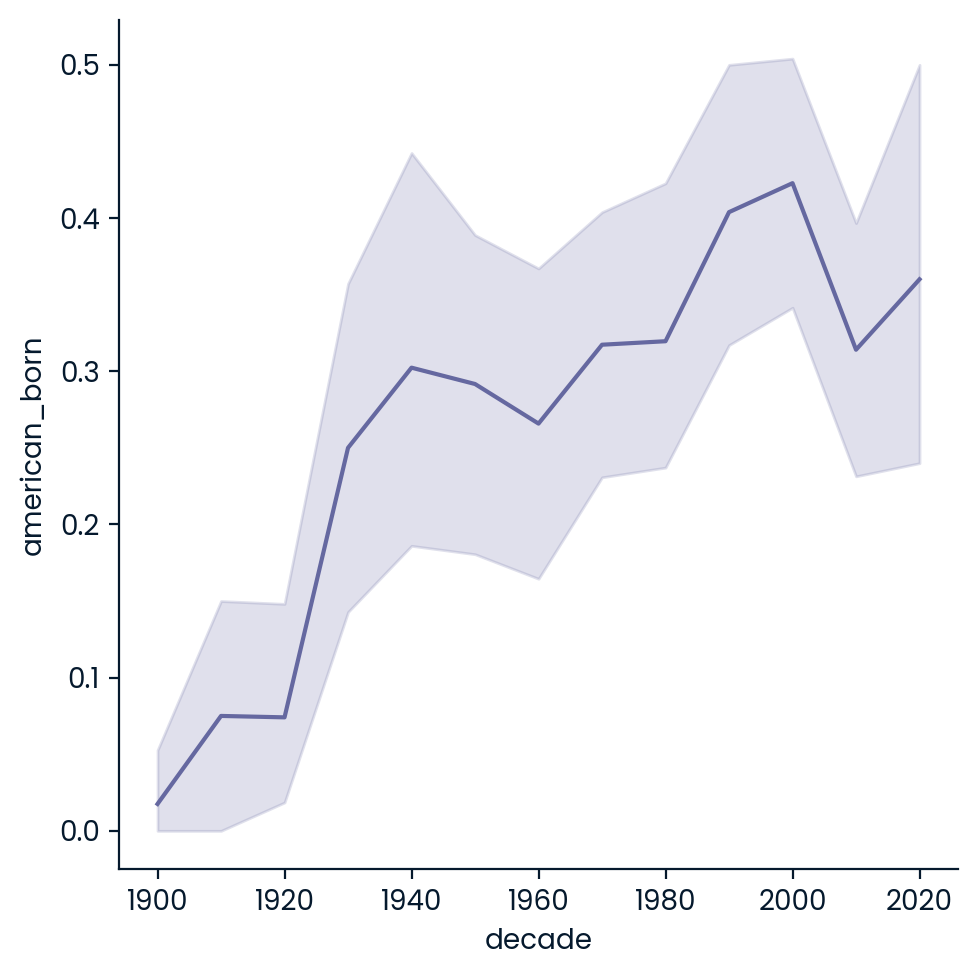

In [53]:
# Alternative solution
nobel['american_born'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = ((nobel['year']//10)*10)
american_ratio = nobel.groupby('decade', as_index=False)['american_born'].mean()
max_decade_usa_index = american_ratio['american_born'] == american_ratio['american_born'].max()
max_decade_usa = american_ratio[max_decade_usa_index]['decade'].values[0]
print("The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories is", max_decade_usa)

# Optional
sns.relplot(x='decade', y='american_born', data=nobel, kind='line')

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

{2020: 'Literature'}


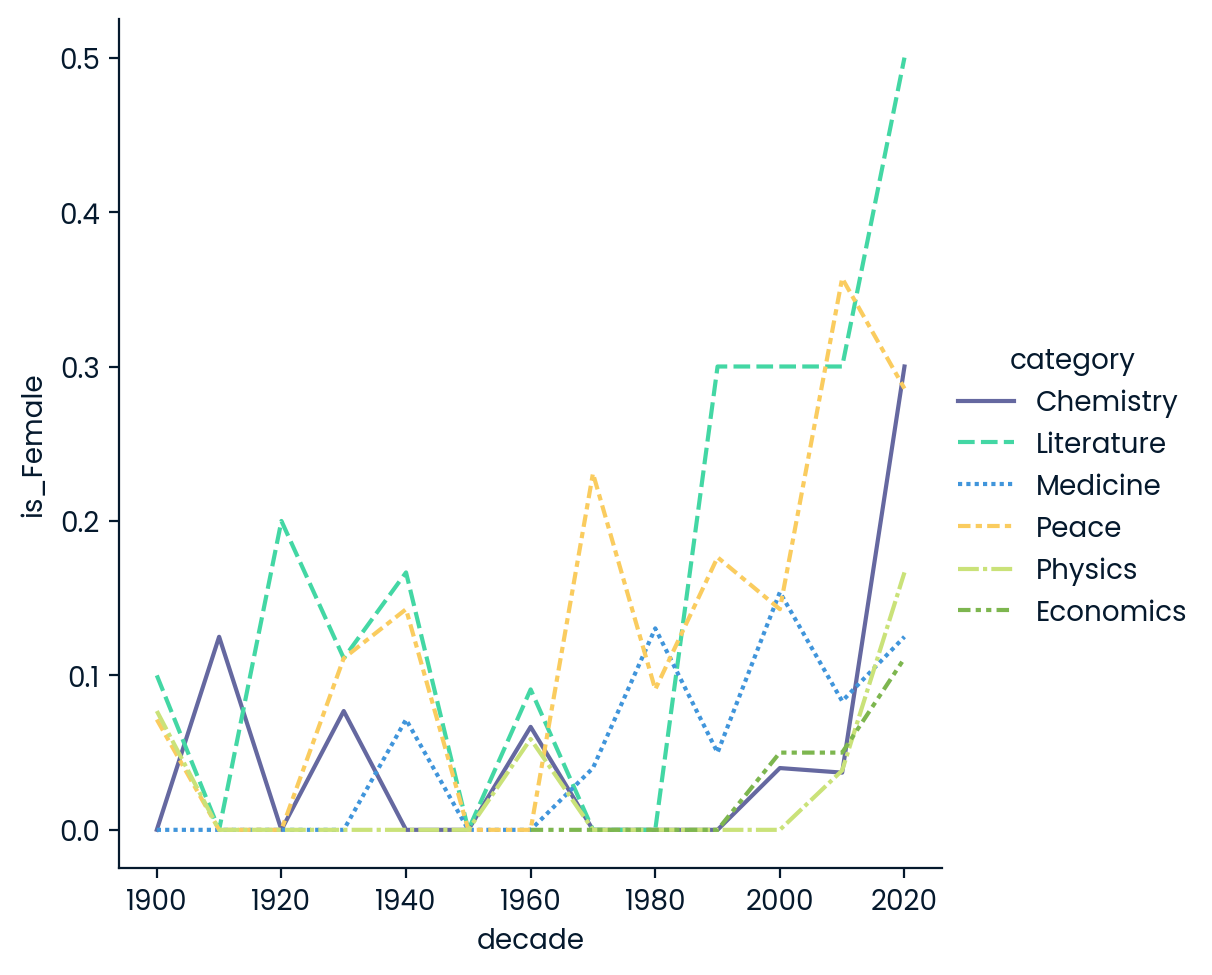

In [54]:
nobel['is_Female'] = nobel['sex'] == 'Female'
female_ratio = nobel.groupby(['decade', 'category'], as_index=False)['is_Female'].mean()
max_female_ratio_index = female_ratio['is_Female'] == female_ratio['is_Female'].max()
max_female_ratio = female_ratio[max_female_ratio_index].reset_index(drop=True)
max_female_dict = {max_female_ratio.loc[0,'decade']:max_female_ratio.loc[0,'category']}
# Alternative: max_female_dict = {max_female_ratio['decade'].values[0]:max_female_ratio['category'].values[0]}
print(max_female_dict)

# Optional
sns.relplot(x='decade', y='is_Female', data=female_ratio, kind='line', hue='category', style='category')

# Who was the first woman to receive a Nobel Prize, and in what category?

In [55]:
first_woman_year = nobel[nobel['is_Female']]['year'].min()
first_woman = nobel[(nobel['year'] == first_woman_year) & (nobel['is_Female'])]
first_woman_name = str(first_woman['full_name'].values[0])
first_woman_category = str(first_woman['category'].values[0])
print('The first woman Nobel Prize winner was', first_woman_name, 'under', first_woman_category)

The first woman Nobel Prize winner was Marie Curie, née Sklodowska under Physics


# Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [56]:
name_counts = nobel['full_name'].value_counts()
name_repeats = name_counts[name_counts>1].index
repeat_list = list(name_repeats)
print('Individuals and organizations which have won multiple Nobel Prizes are ', str(repeat_list))


Individuals and organizations which have won multiple Nobel Prizes are  ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
